<a href="https://colab.research.google.com/github/Pathway2008/criminal-Classification/blob/main/criminal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
Dataset Info.

train.csv [파일]
84406개의 데이터
ID : 샘플 별 고유 id
월 : 사건 발생월
요일 : 월요일 ~ 일요일
시간 : 사건 발생 시각
소관경찰서 : 사건 발생 구역의 담당 경찰서
소관지역 : 사건 발생 구역
사건발생거리 : 가장 가까운 경찰서에서 사건 현장까지의 거리
강수량(mm) 
강설량(mm)
적설량(cm) 
풍향 : 범죄발생지에서 바람이 부는 방향(최대 360도)
안개 : 가시거리가 1km 미만인 경우
짙은안개 : 가시거리가 200m 미만인 경우
번개
진눈깨비
서리
연기/연무 : 먼지, 연기가 하늘을 가리는 현상
눈날림
범죄발생지 : 범죄가 발생한 장소
TARGET : 범죄타입 [0 : 강도, 1: 절도, 2: 상해]
 절도 : 6년이하, 1천만원 이하
 강도 : 5년??
 상해 : 7년이하, 10년이하 영업정

test.csv [파일]
17289개의 데이터
ID : 샘플 별 고유 id
월 : 사건 발생월
요일 : 월요일 ~ 일요일
시간 : 사건 발생 시각
소관경찰서 : 사건 발생 구역의 담당 경찰서
소관지역 : 사건 발생 구역
사건발생거리 : 가장 가까운 경찰서에서 사건 현장까지의 거리
강수량(mm) 
강설량(mm)
적설량(cm) 
풍향 : 범죄발생지에서 바람이 부는 방향(최대 360도)
안개 : 가시거리가 1km 미만인 경우
짙은안개 : 가시거리가 200m 미만인 경우
번개
진눈깨비
서리
연기/연무 : 먼지, 연기가 하늘을 가리는 현상
눈날림
범죄발생지 : 범죄가 발생한 장소


sample_submission.csv [제출양식]
ID : 샘플 별 고유 id
TARGET : 범죄타입 [0 : 강도, 1: 절도, 2: 상해]
'''

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train  = pd.read_csv('/content/drive/MyDrive/analysis/train.csv')

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/analysis/test.csv')

In [ ]:
sub = pd.read_csv('/content/drive/MyDrive/analysis/sample_submission.csv')

In [ ]:
print(train.shape)
train.head(3)

(84406, 20)


,ID,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,범죄발생지,TARGET
0,TRAIN_00000,9,화요일,10,137,8.0,2.611124,0.0,0.0,0.0,245.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,2
1,TRAIN_00001,11,화요일,6,438,13.0,3.209093,0.0,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,0
2,TRAIN_00002,8,일요일,6,1729,47.0,1.619597,0.0,0.0,0.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,인도,1


In [ ]:
train.dtypes

ID          object
월            int64
요일          object
시간           int64
소관경찰서        int64
소관지역       float64
사건발생거리     float64
강수량(mm)    float64
강설량(mm)    float64
적설량(cm)    float64
풍향         float64
안개         float64
짙은안개       float64
번개         float64
진눈깨비       float64
서리         float64
연기/연무      float64
눈날림        float64
범죄발생지       object
TARGET       int64
dtype: object

In [ ]:
train.describe()

,월,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,TARGET
count,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000
mean,6.430195,6.769507,1060.027581,26.881726,1.912424,24.608776,2.284407,23.430503,186.926107,0.385423,0.017842,0.144042,0.020330,0.010260,0.210755,0.008921,0.835355
std,3.108302,3.566390,698.380485,13.870968,0.958556,62.711211,15.852881,85.199896,98.299485,0.486698,0.132379,0.351134,0.141128,0.100771,0.407847,0.094030,0.819762
min,1.000000,1.000000,26.000000,5.000000,0.012269,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,4.000000,526.000000,13.000000,1.209985,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,7.000000,937.000000,27.000000,1.822279,0.625000,0.000000,0.000000,205.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,9.000000,10.000000,1638.000000,38.000000,2.476528,18.571429,0.000000,0.000000,260.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,12.000000,12.000000,2450.000000,54.000000,4.998936,614.875000,295.000000,649.800000,360.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [ ]:
print(train['소관경찰서'].value_counts())
print(train['소관지역'].value_counts())
print(train['범죄발생지'].value_counts())


In [ ]:
train.isnull().sum()

ID         0
월          0
요일         0
시간         0
소관경찰서      0
소관지역       0
사건발생거리     0
강수량(mm)    0
강설량(mm)    0
적설량(cm)    0
풍향         0
안개         0
짙은안개       0
번개         0
진눈깨비       0
서리         0
연기/연무      0
눈날림        0
범죄발생지      0
TARGET     0
dtype: int64

In [ ]:
train = train.drop(['TARGET'],axis=1)
train.shape

(84406, 19)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
corr_train = train.corr().apply(lambda x: round(x ,2))
corr_train

<ipython-input-8-3716e5a5ab16>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_train = train.corr().apply(lambda x: round(x ,2))


,월,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,TARGET
월,1.00,-0.00,0.02,0.03,0.00,0.07,-0.22,-0.40,-0.05,-0.10,-0.18,0.17,-0.16,-0.15,-0.03,-0.14,-0.01
시간,-0.00,1.00,-0.01,-0.01,0.00,0.00,-0.00,-0.00,0.00,-0.01,-0.00,0.00,-0.01,0.00,-0.01,-0.00,0.02
소관경찰서,0.02,-0.01,1.00,0.68,-0.11,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.01,-0.00,0.00,0.00,-0.00
소관지역,0.03,-0.01,0.68,1.00,-0.10,0.00,-0.01,-0.01,-0.00,-0.01,-0.01,0.01,-0.01,-0.01,-0.00,-0.00,-0.00
사건발생거리,0.00,0.00,-0.11,-0.10,1.00,0.01,0.01,0.01,-0.00,-0.00,-0.01,0.00,-0.00,-0.01,-0.00,0.00,0.01
강수량(mm),0.07,0.00,-0.00,0.00,0.01,1.00,0.13,-0.01,-0.03,0.31,-0.04,0.36,-0.03,-0.01,-0.01,0.07,-0.00
강설량(mm),-0.22,-0.00,0.00,-0.01,0.01,0.13,1.00,0.49,0.07,0.13,0.03,-0.06,0.02,0.04,0.06,0.51,-0.02
적설량(cm),-0.40,-0.00,-0.00,-0.01,0.01,-0.01,0.49,1.00,0.17,0.15,0.09,-0.11,0.18,0.01,0.14,0.32,-0.00
풍향,-0.05,0.00,-0.00,-0.00,-0.00,-0.03,0.07,0.17,1.00,0.01,0.04,0.04,-0.06,-0.09,-0.00,0.06,-0.00
안개,-0.10,-0.01,0.00,-0.01,-0.00,0.31,0.13,0.15,0.01,1.00,0.17,0.36,0.11,0.13,0.41,0.12,-0.00


In [ ]:
s = corr_train.unstack()
df = pd.DataFrame(s[s < 1].sort_values(ascending=False), columns=['corr'])
df.style.background_gradient(cmap='viridis')

In [ ]:
fig, ax = plt.subplots(ncols=2)

sns.distplot(train['월'], ax=ax[0])

In [ ]:
sns.countplot(x='요일',data=train,order = ('월요일','화요일','수요일','목요일','금요일','토요일','일요일'))
print(train.groupby('요일').size())

TARGET
0    36453
1    25397
2    22556
dtype: int64


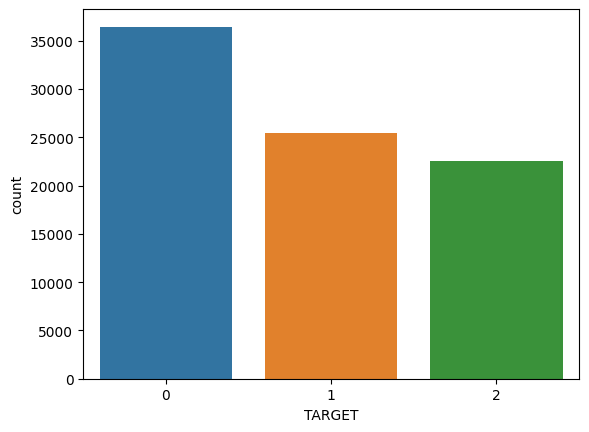

In [ ]:
sns.countplot(x='TARGET',data = y_train)
print(y_train.groupby('TARGET').size())

시간
1     3812
2     3650
3     3622
4     3435
5     3326
6     3345
7     3460
8     3881
9     4007
10    4085
11    4081
12    5087
dtype: int64


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


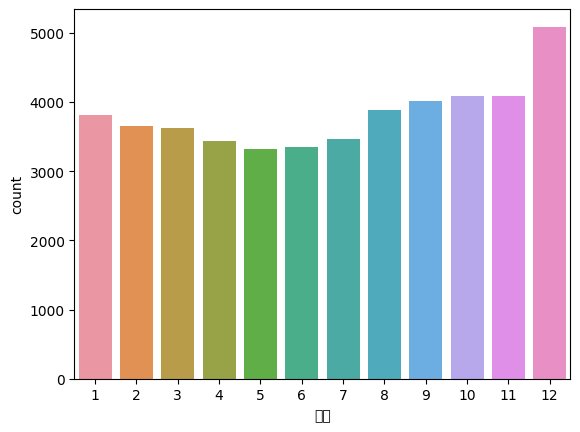

In [ ]:
sns.countplot(x='시간',data = train)
print(train.groupby('시간').size())


1. 주거지와 차도에서 많이발생
2. 주로 밤시간에 많이 발생
3. 평일보단 주말에 많이 발생

In [ ]:
'''
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
'''

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
#plt.rc('font', family='NanumBarunGothic') 

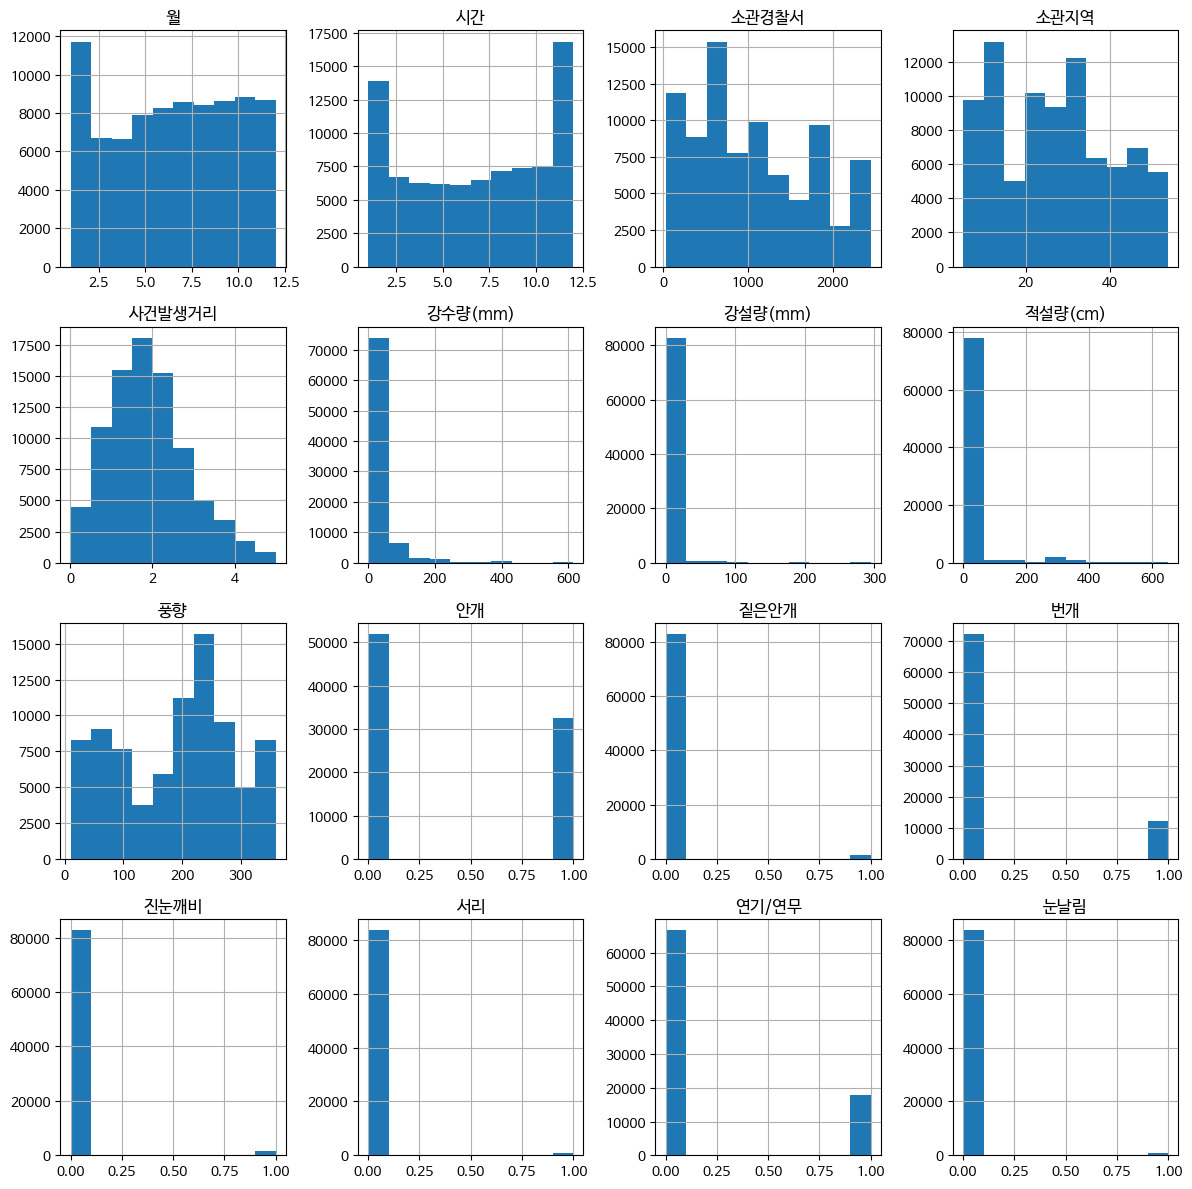

In [ ]:
import warnings
warnings.filterwarnings('ignore')

except_target = train.drop('TARGET', axis = 1)
except_target.hist(figsize = (12,12))
plt.tight_layout()
plt.show()

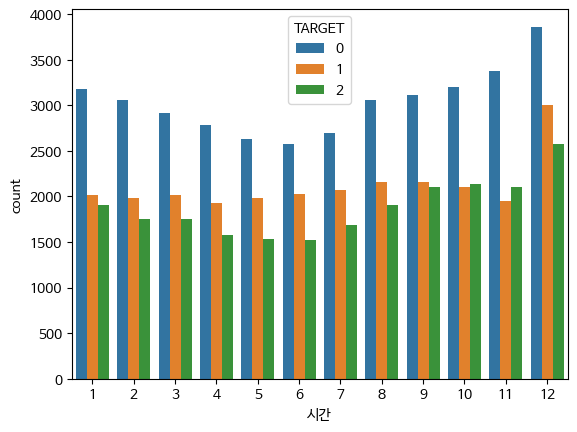

In [ ]:
sns.countplot(x = '시간', hue = 'TARGET', data = train)
plt.show()

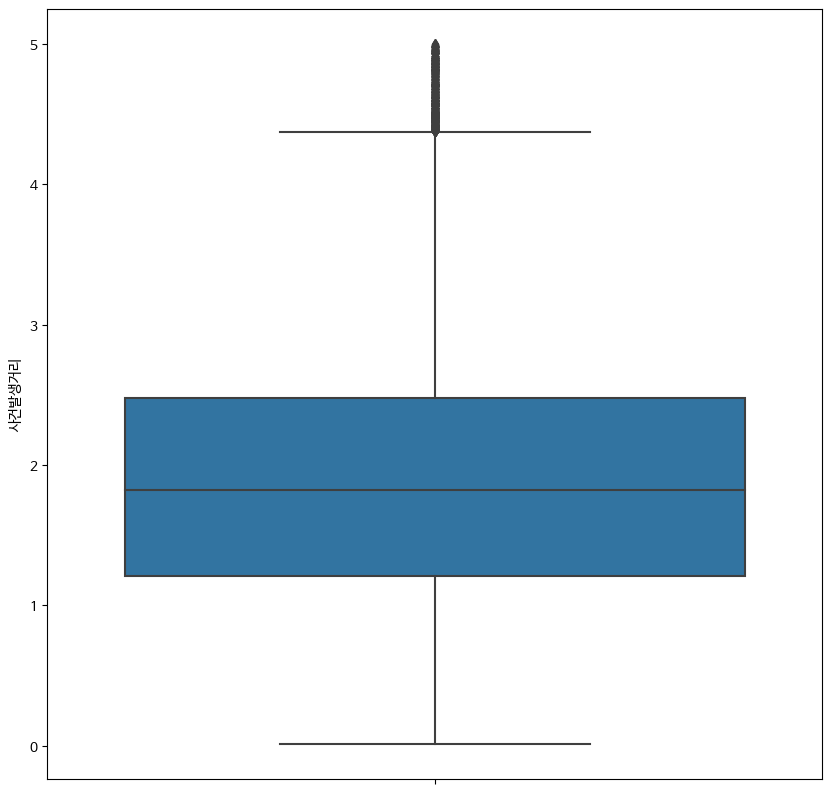

In [ ]:
fig, axes = plt.subplots( figsize = (10,10))

sns.boxplot(y = train['사건발생거리'])

plt.show()

In [ ]:
#x_train = pd.read_csv('/train.csv')
#x_test = pd.read_csv('/test.csv')

FileNotFoundError: ignored

In [ ]:
y_train = train['TARGET']
x_train = train.drop(['ID', 'TARGET'], axis = 1)

x_test = test.drop('ID', axis = 1)

In [ ]:
ordinal_features = ['요일', '범죄발생지']

for feature in ordinal_features:
    le = LabelEncoder()
    le = le.fit(x_train[feature])
    x_train[feature] = le.transform(x_train[feature])

    # x_train데이터에서 존재하지 않았던 값이 x_test 데이터에 존재할 수도 있습니다.
    # 따라서 x_test 데이터를 바로 변형시키지 않고 고윳값을 확인후 x_test 데이터를 변환합니다.
    for label in np.unique(x_test[feature]):
        if label not in le.classes_:
            le.classes_ = np.append(le.classes_, label)
    x_test[feature] = le.transform(x_test[feature])

In [ ]:
x_train.head(5)

In [ ]:
x_test.head(5)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Create a Sequential model
model = Sequential()

# Add layers to the model
model.add(Dense(64, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))



# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=[['accuracy']])

# Train the model
model.fit(x_train, y_train, epochs=50, batch_size=32, verbose=1)

# Make predictions on the test set
y_pred = model.predict(x_test)



In [ ]:
y_pred

array([2, 0, 0, ..., 0, 0, 1])

In [ ]:
y_pred = label_encoder.inverse_transform(y_pred.argmax(axis=1))

In [ ]:
submit = pd.read_csv('/sample_submission.csv')

In [ ]:
submit['TARGET'] = y_pred
submit.head()

,ID,TARGET
0,TEST_00000,2
1,TEST_00001,0
2,TEST_00002,0
3,TEST_00003,0
4,TEST_00004,0


In [ ]:
submit.to_csv('submit.csv', index = False)

In [ ]:
y_pred2 = model.predict(x_train)

2638/2638 [==============================] - 7s 3ms/step


In [ ]:
#y_pred_labels = label_encoder.inverse_transform(y_pred2)
#y_pred_labels

y_pred2 = label_encoder.inverse_transform(y_pred2.argmax(axis=1))

In [ ]:
macro_f1 = f1_score(y_pred2, y_train, average='macro')
print("Macro F1 Score:", macro_f1)

Macro F1 Score: 0.44927942271599886


XGboost

In [ ]:
!pip3 install catboost

In [ ]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [ ]:
x_train.head(5)

In [ ]:
x_test.head(5)

In [ ]:
xgb_model = XGBClassifier()
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
pred_train = xgb_model.predict(x_train)

In [ ]:
macro_f1 = f1_score(pred_train, y_train, average='macro')
macro_f1

0.5768625654868716

In [ ]:
xgb_predictions = xgb_model.predict(x_test)

In [ ]:
sub['TARGET'] = xgb_predictions
sub.head()

,ID,TARGET
0,TEST_00000,2
1,TEST_00001,0
2,TEST_00002,0
3,TEST_00003,0
4,TEST_00004,0


In [ ]:
sub.to_csv('sub_xgb.csv', index = False)

너무 오래걸려서 확인 못함

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score
from sklearn.datasets import make_classification

In [ ]:
#scorer = make_scorer(f1_score, average='macro')
'''
param_grid = {
    
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7]
    

}
'''
#grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring=scorer)
#grid_search.fit(x_train, y_train)

In [ ]:
#random_search = RandomizedSearchCV(estimator = xgb_model,param_distributions=param_grid,cv=5,n_iter = 5,scoring=scorer)
#random_search.fit(x_train,y_train)


KeyboardInterrupt: ignored

LightGBM

In [ ]:
# LightGBM model
lgbm_model = LGBMClassifier()
lgbm_model.fit(x_train, y_train)

LGBMClassifier()

In [ ]:
pred_train = lgbm_model.predict(x_train)

In [ ]:
macro_f1_lgbm = f1_score(pred_train, y_train, average='macro')
macro_f1_lgbm

0.5403499881837176

In [ ]:
lgbm_predictions = lgbm_model.predict(x_test)

In [ ]:
sub['TARGET'] = lgbm_predictions
sub.head()

,ID,TARGET
0,TEST_00000,2
1,TEST_00001,0
2,TEST_00002,0
3,TEST_00003,0
4,TEST_00004,0


In [ ]:
sub.to_csv('sub_lgbm.csv', index = False)

CatBoost

In [ ]:
# CatBoost model
catboost_model = CatBoostClassifier()
catboost_model.fit(x_train, y_train)

Learning rate set to 0.099213
0:	learn: 1.0779572	total: 125ms	remaining: 2m 5s
1:	learn: 1.0613988	total: 165ms	remaining: 1m 22s
2:	learn: 1.0481365	total: 219ms	remaining: 1m 12s
3:	learn: 1.0374785	total: 286ms	remaining: 1m 11s
4:	learn: 1.0285228	total: 357ms	remaining: 1m 11s
5:	learn: 1.0214660	total: 450ms	remaining: 1m 14s
6:	learn: 1.0153040	total: 521ms	remaining: 1m 13s
7:	learn: 1.0098064	total: 608ms	remaining: 1m 15s
8:	learn: 1.0053805	total: 722ms	remaining: 1m 19s
9:	learn: 1.0017243	total: 778ms	remaining: 1m 17s
10:	learn: 0.9986365	total: 840ms	remaining: 1m 15s
11:	learn: 0.9958706	total: 901ms	remaining: 1m 14s
12:	learn: 0.9934927	total: 972ms	remaining: 1m 13s
13:	learn: 0.9918875	total: 1.05s	remaining: 1m 13s
14:	learn: 0.9904436	total: 1.12s	remaining: 1m 13s
15:	learn: 0.9888857	total: 1.2s	remaining: 1m 14s
16:	learn: 0.9876973	total: 1.27s	remaining: 1m 13s
17:	learn: 0.9867318	total: 1.33s	remaining: 1m 12s
18:	learn: 0.9852460	total: 1.39s	remaining: 1

In [ ]:
pred_train = catboost_model.predict(x_train)

In [ ]:
macro_f1_cat = f1_score(pred_train, y_train, average='macro')
macro_f1_cat

0.5626344621598374

In [ ]:
catboost_predictions = catboost_model.predict(x_test)

In [ ]:
sub['TARGET'] = catboost_predictions
sub.head()

,ID,TARGET
0,TEST_00000,2
1,TEST_00001,0
2,TEST_00002,0
3,TEST_00003,0
4,TEST_00004,0


In [ ]:
sub.to_csv('sub_cat.csv', index = False)